In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [42]:
# 2020 Data
full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']
index_df['dates'] = index_df['dates'].astype('datetime64[ns]')

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == '.INX']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
inx_df.head()

,dates,stock,open,close,high,low,volume,category
11904,2020-03-30,.INX,2558.9800,2626.6499,2631.8000,2545.2800,5746220000,Index
11905,2020-03-27,.INX,2555.8701,2541.4700,2615.9099,2520.0200,6194330000,Index
11906,2020-03-26,.INX,2501.2900,2630.0701,2637.0100,2500.7200,7753160000,Index
11907,2020-03-25,.INX,2457.7700,2475.5601,2571.4199,2407.5300,8285670000,Index
11908,2020-03-24,.INX,2344.4399,2447.3301,2449.7100,2344.4399,7547350000,Index


In [44]:
# 2008 Data
full_2008_df = pd.read_csv("../../MVP/Data/full_2008_df.csv")

index_08_df = full_2008_df[full_2008_df['category'] == 'Index']
index_08_df['dates'] = index_08_df['dates'].astype('datetime64[ns]')

dji_08_df = index_08_df.loc[index_08_df['stock'] == 'DJI']
inx_08_df = index_08_df.loc[index_08_df['stock'] == '.INX']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
def plot_data(df_20, df_08, title, title_08, filename):
    
    #Zooming in around crashes (1 month prior 1 month post)
    df_20 = df_20.sort_values('dates', ascending=True)

    crash_20 = (df_20['dates'] >= '2020-01-28')
    crash_20_df = df_20.loc[crash_20]

    df_08 = df_08.sort_values('dates', ascending=True)
    crash_08 = (df_08['dates'] >= '2008-08-29') & (df_08['dates'] <= '2008-10-29')
    crash_08_df = df_08.loc[crash_08]

    #Plotting 2020 crash data vs 2008 crash data
    fig = plt.figure(figsize=(20,10))                                       
    
    ax = fig.add_subplot(211)                                                  
    crash_20_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    
    x_20 = mdates.date2num(crash_20_df['dates'].tolist())                           
    y_20 = crash_20_df['close'].tolist()
    z_20 = np.polyfit(x_20, y_20, 8)
    p_20 = np.poly1d(z_20)
    plt.plot(x_20,p_20(x_20), 'r--')                                           
    
    plt.grid()
                         
    ax = fig.add_subplot(212)                                                  
    crash_08_df.plot(y='close', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title_08)
    
    x_08 = mdates.date2num(crash_08_df['dates'].tolist())                           
    y_08 = crash_08_df['close'].tolist()
    z_08 = np.polyfit(x_08, y_08, 8)
    p_08 = np.poly1d(z_08)
    plt.plot(x_08,p_08(x_08), 'r--')                                                 
    
    plt.grid()
    
    plt.tight_layout()
    plt.savefig("../../MVP/Images/JakeH/" + filename)
    plt.show()                                                              
    
    return ax

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RankWarning: Polyfit may be poorly conditioned
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


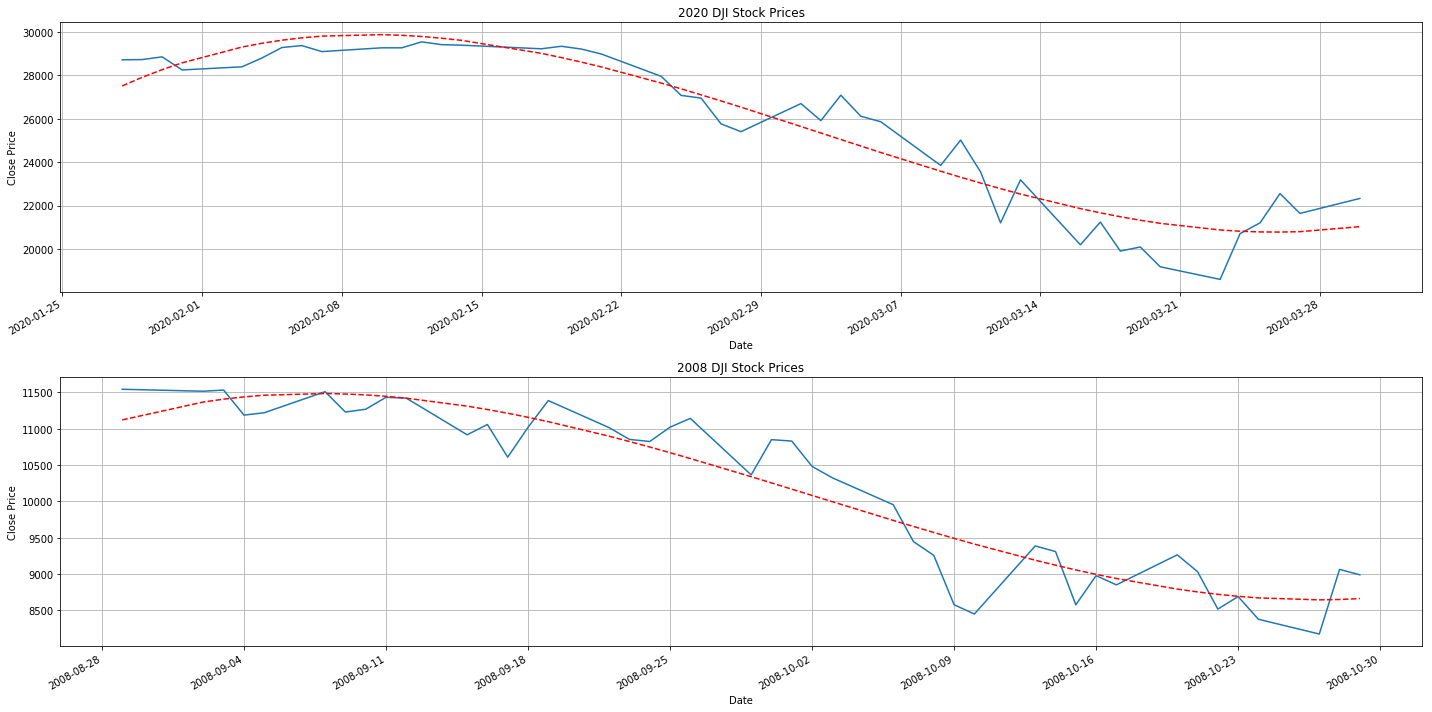

In [46]:
DJI_chart = plot_data(dji_df, dji_08_df, '2020 DJI Stock Prices', '2008 DJI Stock Prices', 'DJI_20vs08.png')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RankWarning: Polyfit may be poorly conditioned
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RankWarning: Polyfit may be poorly conditioned


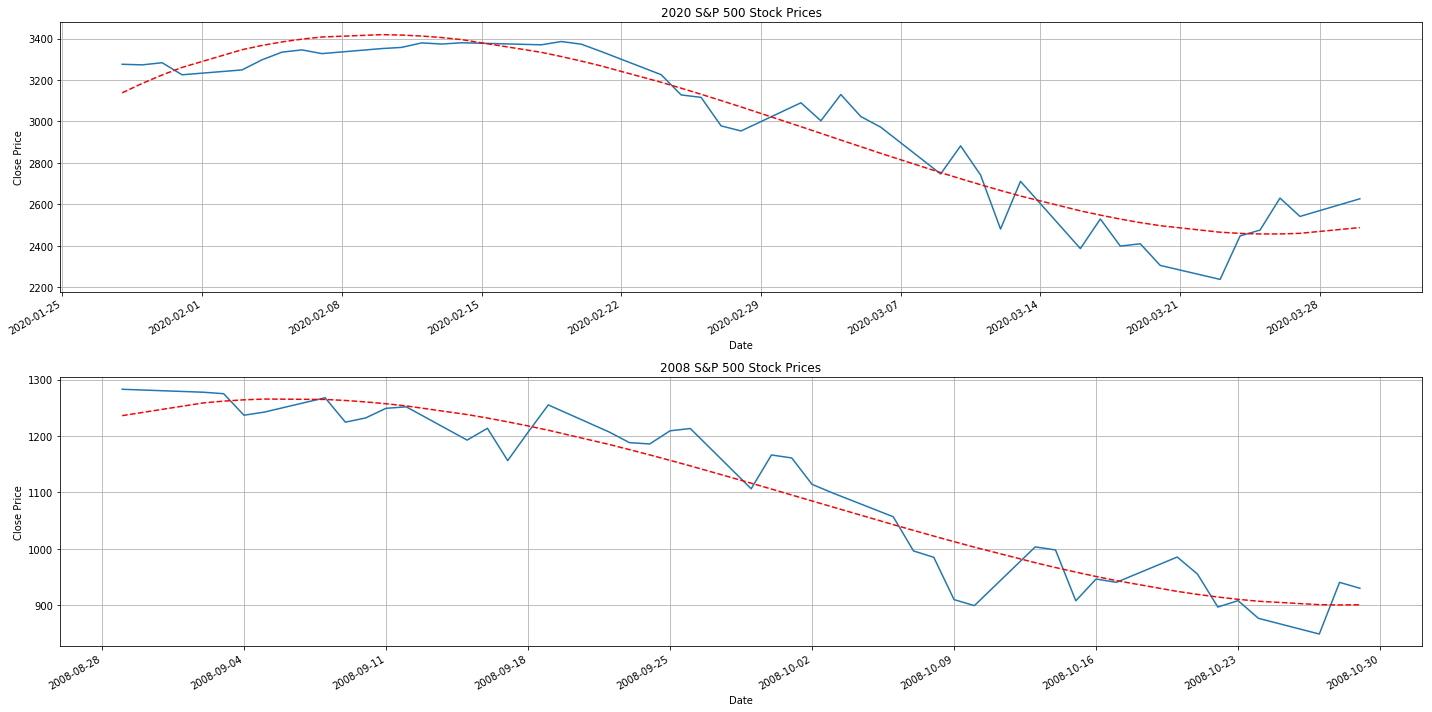

In [48]:
INX_chart = plot_data(inx_df, inx_08_df, '2020 S&P 500 Stock Prices', '2008 S&P 500 Stock Prices', 'inx_20vs08.png')